In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Load Results

## Uninterrupted

In [2]:
PPL_TXL_uninterrupted = pd.read_csv("results/TXL-400/Uninterrupted/UninterruptedPPL_tXL_APAMarriageArticle_FixLenWin_1024.csv")

PPL_TXL_base = np.array(PPL_TXL_uninterrupted['PPL_base'][1:])
PPL_TXL_w_context_uninterrupted = np.array(PPL_TXL_uninterrupted['PPL_w_context_uninterr'][1:])
TXL_sents_article = np.array(PPL_TXL_uninterrupted['target_sent'][1:])

PPL_TXL_w_context_to_base_uninterrupted = np.divide(PPL_TXL_w_context_uninterrupted, PPL_TXL_base)

## Interrupted (4-sentence)

### <span style='background :yellow' > 1st target sentence </span>

In [14]:
run_nums = 5
bin_nums = 6
trg_sent_nums = 5

diff_PPL_intrp_all_runs = []
sim_intrp_all_runs = []
PPL_base_all_runs = []
PPL_w_context_all_runs = []
PPL_intrp_all_runs = []

TXL_diff_PPL_intrp_all_runs_bin1 = []
TXL_diff_PPL_intrp_all_runs_bin2 = []
TXL_diff_PPL_intrp_all_runs_bin3 = []
TXL_diff_PPL_intrp_all_runs_bin4 = []
TXL_diff_PPL_intrp_all_runs_bin5 = []
TXL_diff_PPL_intrp_all_runs_bin6 = []

sim_intrp_all_runs_bin1 = []
sim_intrp_all_runs_bin2 = []
sim_intrp_all_runs_bin3 = []
sim_intrp_all_runs_bin4 = []
sim_intrp_all_runs_bin5 = []
sim_intrp_all_runs_bin6 = []

PPL_base_all_runs_bin = []
PPL_w_context_all_runs_bin = []

PPL_intrp_all_runs_bin1 = []
PPL_intrp_all_runs_bin2 = []
PPL_intrp_all_runs_bin3 = []
PPL_intrp_all_runs_bin4 = []
PPL_intrp_all_runs_bin5 = []
PPL_intrp_all_runs_bin6 = []

for counter_run in range(1, run_nums+1):
    
    PPL_TXL_data_run = pd.read_excel("results/TXL-400/Interrupted/bins-4-sents/PPL_tXL_results_4sents_6bins_APA_marriage_FixLenWin_1024_seed_"+str(counter_run)+".xlsx")
            
    for counter_trg_sent in range(trg_sent_nums):
        
        target_sent = ast.literal_eval(PPL_TXL_data_run['target_sent'][counter_trg_sent])[0] 
        PPL_intrp_target_sent_all_bins = ast.literal_eval(PPL_TXL_data_run['ppl_intrp_target_all_bins'][counter_trg_sent])
        sim_intrp_all_bins = np.mean(np.array(ast.literal_eval(PPL_TXL_data_run['sim_intrp_all_bins'][counter_trg_sent])), 1)
        
        ind_target_sent_unintrp = np.where(TXL_sents_article == target_sent)
        
        PPL_base_target_sent = PPL_TXL_base[ind_target_sent_unintrp]
        PPL_w_context_target_sent = PPL_TXL_w_context_uninterrupted[ind_target_sent_unintrp]
        
        PPL_w_context_to_base_target_sent = np.divide(PPL_w_context_target_sent, PPL_base_target_sent)
        PPL_intrp_to_base_target_sent_all_bins = np.divide(PPL_intrp_target_sent_all_bins, PPL_base_target_sent)    

        diff_PPL_intrp = PPL_intrp_to_base_target_sent_all_bins - PPL_w_context_to_base_target_sent

        
        ## exclusion criteria ##
        trg_exclude_1 = '<|endoftext|>"Money is the No.'
        trg_exclude_2 = '<|endoftext|>1 source of conflict or tension," she says.'

        if target_sent == trg_exclude_1 or target_sent == trg_exclude_2:
            print('skipped')
            continue
            
        else:
            
            diff_PPL_intrp_all_runs.append(diff_PPL_intrp)
            sim_intrp_all_runs.append(sim_intrp_all_bins)
            
            PPL_base_all_runs.append([PPL_base_target_sent]*bin_nums)
            PPL_w_context_all_runs.append([PPL_w_context_target_sent]*bin_nums)
            PPL_intrp_all_runs.append(PPL_intrp_target_sent_all_bins)
            
            for counter_bin in range(1, bin_nums+1):
                
                exec(f'PPL_intrp_all_runs_bin{counter_bin}.append(PPL_intrp_target_sent_all_bins[counter_bin-1])')
                exec(f'sim_intrp_all_runs_bin{counter_bin}.append(sim_intrp_all_bins[counter_bin-1])')
                exec(f'TXL_diff_PPL_intrp_all_runs_bin{counter_bin}.append(diff_PPL_intrp[counter_bin-1])')
                
            PPL_base_all_runs_bin.append(PPL_base_target_sent)
            PPL_w_context_all_runs_bin.append(PPL_w_context_target_sent)
            
TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten = np.array(diff_PPL_intrp_all_runs).flatten()
TXL_4sents_1stTarget_sim_intrp_all_runs_flatten = np.array(sim_intrp_all_runs).flatten()
TXL_4sents_1stTarget_PPL_base_all_runs_flatten = np.array(PPL_base_all_runs).flatten()
TXL_4sents_1stTarget_PPL_w_context_all_runs_flatten = np.array(PPL_w_context_all_runs).flatten()
TXL_4sents_1stTarget_PPL_intrp_all_runs_flatten = np.array(PPL_intrp_all_runs).flatten()

skipped


### <span style='background :yellow' > 2nd target sentence </span>

In [4]:
run_nums = 5
bin_nums = 6
trg_sent_nums = 5

diff_PLL_intrp_all_runs = []
sim_intrp_all_runs = []
PPL_base_all_runs = []
PPL_w_context_all_runs = []
PPL_intrp_all_runs = []

TXL_diff_PLL_intrp_all_runs_bin1 = []
TXL_diff_PLL_intrp_all_runs_bin2 = []
TXL_diff_PLL_intrp_all_runs_bin3 = []
TXL_diff_PLL_intrp_all_runs_bin4 = []
TXL_diff_PLL_intrp_all_runs_bin5 = []
TXL_diff_PLL_intrp_all_runs_bin6 = []

sim_intrp_all_runs_bin1 = []
sim_intrp_all_runs_bin2 = []
sim_intrp_all_runs_bin3 = []
sim_intrp_all_runs_bin4 = []
sim_intrp_all_runs_bin5 = []
sim_intrp_all_runs_bin6 = []

PPL_base_all_runs_bin = []
PPL_w_context_all_runs_bin = []

PPL_intrp_all_runs_bin1 = []
PPL_intrp_all_runs_bin2 = []
PPL_intrp_all_runs_bin3 = []
PPL_intrp_all_runs_bin4 = []
PPL_intrp_all_runs_bin5 = []
PPL_intrp_all_runs_bin6 = []

for counter_run in range(1, run_nums+1):
    
    PPL_TXL_data_run = pd.read_excel("results/TXL-400/Interrupted/bins-4-sents/PPL_tXL_results_4sentsIntrp_MultipleTargets_2nd3rd_Debugged_v2_6bins_APA_marriage_FixLenWin_1024_seed_"+str(counter_run)+".xlsx")
            
    for counter_trg_sent in range(trg_sent_nums):
        
        target_sent_1st = ast.literal_eval(PPL_TXL_data_run['target_sent_1st'][counter_trg_sent])[0] 
        target_sent_2nd = ast.literal_eval(PPL_TXL_data_run['target_sent_2nd'][counter_trg_sent])[0] 
        target_sent_3rd = ast.literal_eval(PPL_TXL_data_run['target_sent_3rd'][counter_trg_sent])[0] 
        
        PPL_intrp_target_sent_2nd_all_bins = ast.literal_eval(PPL_TXL_data_run['ppl_intrp_2ndtarget_all_bins'][counter_trg_sent])
        sim_intrp_all_bins = ast.literal_eval(PPL_TXL_data_run['sim_intrp_all_bins'][counter_trg_sent]) 
        
        ind_target_sent_2nd_unintrp = np.where(TXL_sents_article == target_sent_2nd)
        
        PPL_base_target_sent_2nd = PPL_TXL_base[ind_target_sent_2nd_unintrp]
        PPL_w_context_target_sent_2nd = PPL_TXL_w_context_uninterrupted[ind_target_sent_2nd_unintrp]
        
        PPL_w_context_to_base_target_sent_2nd = np.divide(PPL_w_context_target_sent_2nd, PPL_base_target_sent_2nd)
        PPL_intrp_to_base_target_sent_2nd_all_bins = np.divide(PPL_intrp_target_sent_2nd_all_bins, PPL_base_target_sent_2nd)    

        diff_PPL_intrp = PPL_intrp_to_base_target_sent_2nd_all_bins - PPL_w_context_to_base_target_sent_2nd

        
        ## exclusion criteria ##
        trg_exclude_1 = '<|endoftext|>"Money is the No.'
        trg_exclude_2 = '<|endoftext|>1 source of conflict or tension," she says.'

        if target_sent_1st == trg_exclude_1 or target_sent_1st == trg_exclude_2:
            print('skipped')
            continue
            
        elif target_sent_2nd == trg_exclude_1 or target_sent_2nd == trg_exclude_2:
            print('skipped')
            continue
            
        elif target_sent_3rd == trg_exclude_1 or target_sent_3rd == trg_exclude_2:
            print('skipped')
            continue
            
        else:
            
            diff_PLL_intrp_all_runs.append(diff_PPL_intrp)
            sim_intrp_all_runs.append(sim_intrp_all_bins)
            
            PPL_base_all_runs.append([PPL_base_target_sent_2nd]*bin_nums)
            PPL_w_context_all_runs.append([PPL_w_context_target_sent_2nd]*bin_nums)
            PPL_intrp_all_runs.append(PPL_intrp_target_sent_2nd_all_bins)
            
            for counter_bin in range(1, bin_nums+1):
                
                exec(f'PPL_intrp_all_runs_bin{counter_bin}.append(PPL_intrp_target_sent_2nd_all_bins[counter_bin-1])')
                exec(f'sim_intrp_all_runs_bin{counter_bin}.append(sim_intrp_all_bins[counter_bin-1])')
                exec(f'TXL_diff_PLL_intrp_all_runs_bin{counter_bin}.append(diff_PPL_intrp[counter_bin-1])')
                
            PPL_base_all_runs_bin.append(PPL_base_target_sent_2nd)
            PPL_w_context_all_runs_bin.append(PPL_w_context_target_sent_2nd)
            
TXL_4sents_2ndTarget_diff_PPL_intrp_all_runs_flatten = np.array(diff_PLL_intrp_all_runs).flatten()
TXL_4setns_2ndTarget_sim_intrp_all_runs_flatten = np.array(sim_intrp_all_runs).flatten()
TXL_4sents_2ndTarget_PPL_base_all_runs_flatten = np.array(PPL_base_all_runs).flatten()
TXL_4sents_2ndTarget_PPL_w_context_all_runs_flatten = np.array(PPL_w_context_all_runs).flatten()
TXL_4sents_2ndTarget_PPL_intrp_all_runs_flatten = np.array(PPL_intrp_all_runs).flatten()

skipped


### <span style='background :yellow' > 3rd target sentence </span>

In [5]:
run_nums = 5
bin_nums = 6
trg_sent_nums = 5

diff_PLL_intrp_all_runs = []
sim_intrp_all_runs = []
PPL_base_all_runs = []
PPL_w_context_all_runs = []
PPL_intrp_all_runs = []

TXL_diff_PLL_intrp_all_runs_bin1 = []
TXL_diff_PLL_intrp_all_runs_bin2 = []
TXL_diff_PLL_intrp_all_runs_bin3 = []
TXL_diff_PLL_intrp_all_runs_bin4 = []
TXL_diff_PLL_intrp_all_runs_bin5 = []
TXL_diff_PLL_intrp_all_runs_bin6 = []

sim_intrp_all_runs_bin1 = []
sim_intrp_all_runs_bin2 = []
sim_intrp_all_runs_bin3 = []
sim_intrp_all_runs_bin4 = []
sim_intrp_all_runs_bin5 = []
sim_intrp_all_runs_bin6 = []

PPL_base_all_runs_bin = []
PPL_w_context_all_runs_bin = []

PPL_intrp_all_runs_bin1 = []
PPL_intrp_all_runs_bin2 = []
PPL_intrp_all_runs_bin3 = []
PPL_intrp_all_runs_bin4 = []
PPL_intrp_all_runs_bin5 = []
PPL_intrp_all_runs_bin6 = []

for counter_run in range(1, run_nums+1):
    
    PPL_TXL_data_run = pd.read_excel("results/TXL-400/Interrupted/bins-4-sents/PPL_tXL_results_4sentsIntrp_MultipleTargets_2nd3rd_Debugged_v2_6bins_APA_marriage_FixLenWin_1024_seed_"+str(counter_run)+".xlsx")
            
    for counter_trg_sent in range(trg_sent_nums):
        
        target_sent_1st = ast.literal_eval(PPL_TXL_data_run['target_sent_1st'][counter_trg_sent])[0] 
        target_sent_2nd = ast.literal_eval(PPL_TXL_data_run['target_sent_2nd'][counter_trg_sent])[0] 
        target_sent_3rd = ast.literal_eval(PPL_TXL_data_run['target_sent_3rd'][counter_trg_sent])[0] 
        
        PPL_intrp_target_sent_3rd_all_bins = ast.literal_eval(PPL_TXL_data_run['ppl_intrp_3rdtarget_all_bins'][counter_trg_sent])
        sim_intrp_all_bins = ast.literal_eval(PPL_TXL_data_run['sim_intrp_all_bins'][counter_trg_sent]) 
        
        ind_target_sent_3rd_unintrp = np.where(TXL_sents_article == target_sent_3rd)
        
        PPL_base_target_sent_3rd = PPL_TXL_base[ind_target_sent_3rd_unintrp]
        PPL_w_context_target_sent_3rd = PPL_TXL_w_context_uninterrupted[ind_target_sent_3rd_unintrp]
        
        PPL_w_context_to_base_target_sent_3rd = np.divide(PPL_w_context_target_sent_3rd, PPL_base_target_sent_3rd)
        PPL_intrp_to_base_target_sent_3rd_all_bins = np.divide(PPL_intrp_target_sent_3rd_all_bins, PPL_base_target_sent_3rd)    

        diff_PPL_intrp = PPL_intrp_to_base_target_sent_3rd_all_bins - PPL_w_context_to_base_target_sent_3rd

        
        ## exclusion criteria ##
        trg_exclude_1 = '<|endoftext|>"Money is the No.'
        trg_exclude_2 = '<|endoftext|>1 source of conflict or tension," she says.'

        if target_sent_1st == trg_exclude_1 or target_sent_1st == trg_exclude_2:
            print('skipped')
            continue
            
        elif target_sent_2nd == trg_exclude_1 or target_sent_2nd == trg_exclude_2:
            print('skipped')
            continue
            
        elif target_sent_3rd == trg_exclude_1 or target_sent_3rd == trg_exclude_2:
            print('skipped')
            continue
            
        else:
            
            diff_PLL_intrp_all_runs.append(diff_PPL_intrp)
            sim_intrp_all_runs.append(sim_intrp_all_bins)
            
            PPL_base_all_runs.append([PPL_base_target_sent_3rd]*bin_nums)
            PPL_w_context_all_runs.append([PPL_w_context_target_sent_3rd]*bin_nums)
            PPL_intrp_all_runs.append(PPL_intrp_target_sent_3rd_all_bins)
            
            for counter_bin in range(1, bin_nums+1):
                
                exec(f'PPL_intrp_all_runs_bin{counter_bin}.append(PPL_intrp_target_sent_3rd_all_bins[counter_bin-1])')
                exec(f'sim_intrp_all_runs_bin{counter_bin}.append(sim_intrp_all_bins[counter_bin-1])')
                exec(f'TXL_diff_PLL_intrp_all_runs_bin{counter_bin}.append(diff_PPL_intrp[counter_bin-1])')
                
            PPL_base_all_runs_bin.append(PPL_base_target_sent_3rd)
            PPL_w_context_all_runs_bin.append(PPL_w_context_target_sent_3rd)
            
TXL_4sents_3rdTarget_diff_PPL_intrp_all_runs_flatten = np.array(diff_PLL_intrp_all_runs).flatten()
TXL_4sents_3rdTarget_sim_intrp_all_runs_flatten = np.array(sim_intrp_all_runs).flatten()
TXL_4sents_3rdTarget_PPL_base_all_runs_flatten = np.array(PPL_base_all_runs).flatten()
TXL_4sents_3rdTarget_PPL_w_context_all_runs_flatten = np.array(PPL_w_context_all_runs).flatten()
TXL_4sents_3rdTarget_PPL_intrp_all_runs_flatten = np.array(PPL_intrp_all_runs).flatten()

skipped


# Plot

### Including outliers

correlation coefficient: -0.07282675386213697


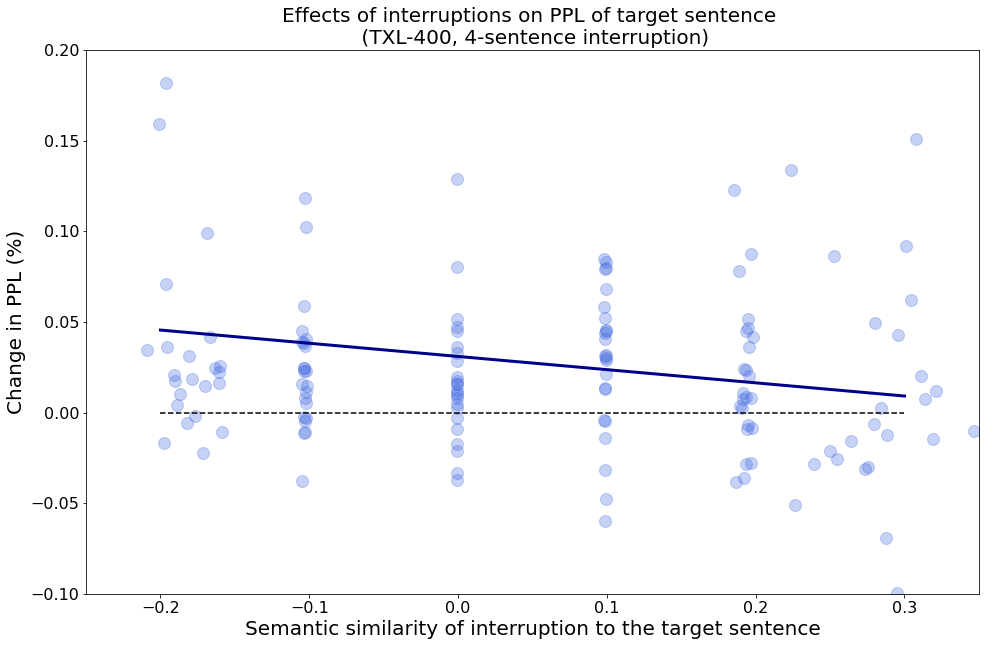

In [29]:
reg_fit = LinearRegression().fit(TXL_4sents_1stTarget_sim_intrp_all_runs_flatten.reshape(-1, 1), TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten.reshape(-1, 1))

print('correlation coefficient: '+str(reg_fit.coef_[0][0]))

plt.figure(figsize=(16, 10))

plt.plot(TXL_4sents_1stTarget_sim_intrp_all_runs_flatten, TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten, 'o', color = 'royalblue', markersize= 12, alpha= 0.3)

plt.ylabel('Change in PPL (%)', fontsize = 20)
plt.xlabel('Semantic similarity of interruption to the target sentence', fontsize = 20)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.title('Effects of interruptions on PPL of target sentence \n (TXL-400, 4-sentence interruption)', fontsize = 20)
# plt.savefig('../Figures/comparing semantic similarity between passages_carver-SAT_carver-rainy day.png')
#
# plt.ylim([-0.05, 0.2])
plt.xlim([-0.25, 0.35])
plt.ylim([-0.1, 0.2])

reg = LinearRegression().fit(TXL_4sents_1stTarget_sim_intrp_all_runs_flatten.reshape(-1,1), (TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten).reshape(-1,1))

x_pred = np.linspace(-0.2, 0.3, len(TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten)).reshape(-1,1)
y_pred = reg.predict(x_pred)

plt.plot(x_pred, y_pred, linewidth = 3, color = 'darkblue')

plt.plot(x_pred, [0]*len(x_pred), 'k--')

# exec(f'plt.savefig("Figures/Interruption_effect_TXL_4sentsIntrp_scatter_fit.pdf")')
# exec(f'plt.savefig("Figures/Interruption_effect_TXL_4sentsIntrp_scatter_fit.png")')

plt.show()

### Detect Outliers

In [31]:
sample_size = TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten.shape[0]
outlier_inds = [i for i in range(sample_size) if TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten[i]>0.2]
print(outlier_inds)

[13, 102]


In [37]:
TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten[outlier_inds]

array([0.2873713 , 0.48789769])

correlation coefficient: -0.07282675386213697


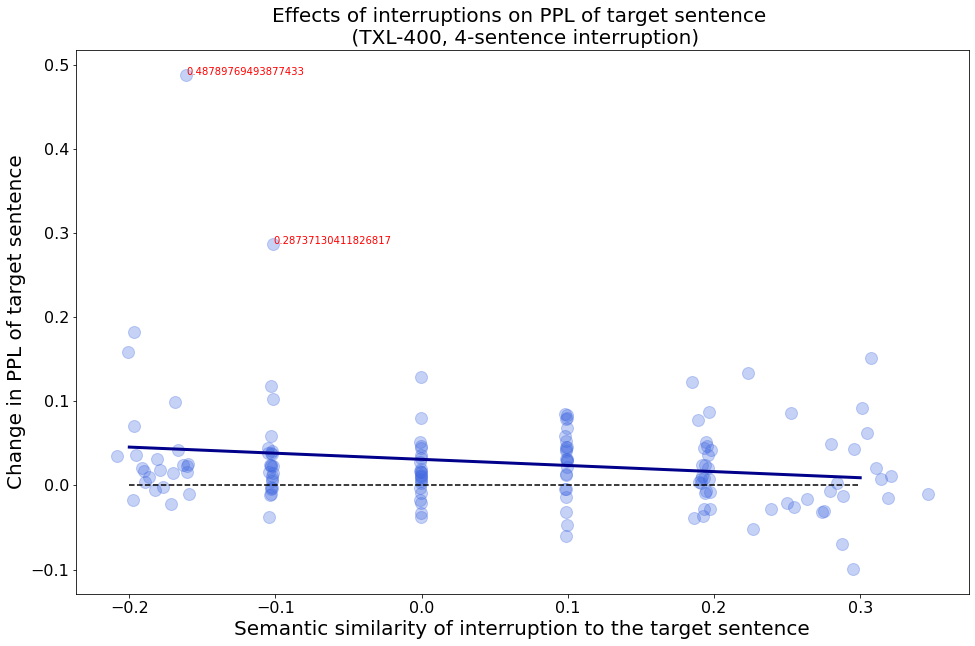

In [39]:
reg_fit = LinearRegression().fit(TXL_4sents_1stTarget_sim_intrp_all_runs_flatten.reshape(-1, 1), TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten.reshape(-1, 1))

print('correlation coefficient: '+str(reg_fit.coef_[0][0]))

plt.figure(figsize=(16, 10))

plt.plot(TXL_4sents_1stTarget_sim_intrp_all_runs_flatten, TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten, 'o', color = 'royalblue', markersize= 12, alpha= 0.3)

plt.ylabel('Change in PPL of target sentence', fontsize = 20)
plt.xlabel('Semantic similarity of interruption to the target sentence', fontsize = 20)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

# Annotate outliers
for i in outlier_inds:
    plt.annotate(TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten[i], (TXL_4sents_1stTarget_sim_intrp_all_runs_flatten[i],TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten[i]),c='r')

plt.title('Effects of interruptions on PPL of target sentence \n (TXL-400, 4-sentence interruption)', fontsize = 20)
# plt.savefig('../Figures/comparing semantic similarity between passages_carver-SAT_carver-rainy day.png')
#
# plt.ylim([-0.05, 0.2])
# plt.xlim([-0.25, 0.35])
# plt.ylim([-0.1, 0.2])

reg = LinearRegression().fit(TXL_4sents_1stTarget_sim_intrp_all_runs_flatten.reshape(-1,1), (TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten).reshape(-1,1))

x_pred = np.linspace(-0.2, 0.3, len(TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten)).reshape(-1,1)
y_pred = reg.predict(x_pred)

plt.plot(x_pred, y_pred, linewidth = 3, color = 'darkblue')

plt.plot(x_pred, [0]*len(x_pred), 'k--')

# exec(f'plt.savefig("Figures/Interruption_effect_TXL_4sentsIntrp_scatter_fit.pdf")')
# exec(f'plt.savefig("Figures/Interruption_effect_TXL_4sentsIntrp_scatter_fit.png")')

plt.show()

### Remove Outliers

In [32]:
TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten_no_outliers = np.delete(TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten, outlier_inds)
TXL_4sents_1stTarget_sim_intrp_all_runs_flatten_no_outliers = np.delete(TXL_4sents_1stTarget_sim_intrp_all_runs_flatten, outlier_inds)

In [33]:
TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten_no_outliers.shape

(142,)

correlation coefficient: -0.03703777422202859


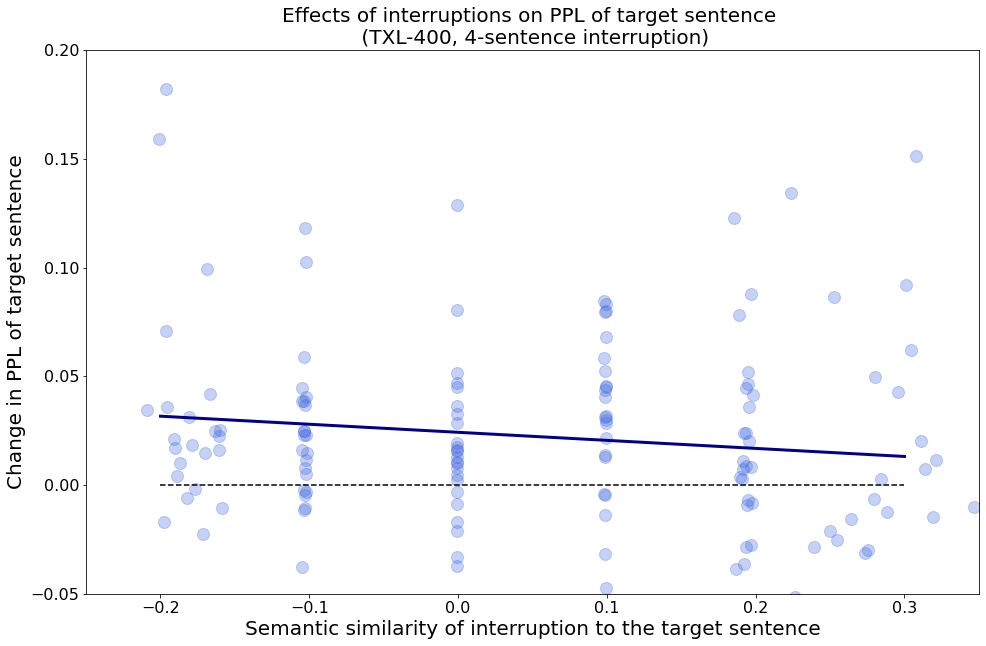

In [40]:
reg_fit = LinearRegression().fit(TXL_4sents_1stTarget_sim_intrp_all_runs_flatten_no_outliers.reshape(-1, 1), TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten_no_outliers.reshape(-1, 1))

print('correlation coefficient: '+str(reg_fit.coef_[0][0]))

plt.figure(figsize=(16, 10))

plt.plot(TXL_4sents_1stTarget_sim_intrp_all_runs_flatten_no_outliers, TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten_no_outliers, 'o', color = 'royalblue', markersize= 12, alpha= 0.3)

plt.ylabel('Change in PPL of target sentence', fontsize = 20)
plt.xlabel('Semantic similarity of interruption to the target sentence', fontsize = 20)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.title('Effects of interruptions on PPL of target sentence \n (TXL-400, 4-sentence interruption)', fontsize = 20)
# plt.savefig('../Figures/comparing semantic similarity between passages_carver-SAT_carver-rainy day.png')
#
# plt.ylim([-0.05, 0.2])
plt.xlim([-0.25, 0.35])
plt.ylim([-0.05, 0.2])

reg = LinearRegression().fit(TXL_4sents_1stTarget_sim_intrp_all_runs_flatten_no_outliers.reshape(-1,1), (TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten_no_outliers).reshape(-1,1))

x_pred = np.linspace(-0.2, 0.3, len(TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten_no_outliers)).reshape(-1,1)
y_pred = reg.predict(x_pred)

plt.plot(x_pred, y_pred, linewidth = 3, color = 'darkblue')

plt.plot(x_pred, [0]*len(x_pred), 'k--')

# exec(f'plt.savefig("Figures/Interruption_effect_TXL_4sentsIntrp_scatter_fit.pdf")')
# exec(f'plt.savefig("Figures/Interruption_effect_TXL_4sentsIntrp_scatter_fit.png")')

plt.show()